Import Libraries

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
data=pd.read_csv('housing.csv')

In [30]:
# Fill missing values
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

# Encode 'ocean_proximity' using one-hot encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

# Select features and target
features = ['housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income'] + \
           list(data.columns[data.columns.str.startswith('ocean_proximity_')])

X = data[features]
y = data['median_house_value']

In [31]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# 5. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# 6. Make predictions
y_pred = model.predict(X_test)

In [35]:
# 7. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 51248.50
Mean Squared Error (MSE): 5029139432.10
Root Mean Squared Error (RMSE): 70916.43
R-squared (R2): 0.62


In [36]:
# 8. Coefficients Interpretation
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                      Feature    Coefficient
0          housing_median_age    1211.533590
1                 total_rooms      -7.356080
2              total_bedrooms      82.421087
3                  population     -37.256404
4                  households      76.871509
5               median_income   40659.325023
6      ocean_proximity_INLAND  -68604.578269
7      ocean_proximity_ISLAND  157877.340172
8    ocean_proximity_NEAR BAY    3228.247281
9  ocean_proximity_NEAR OCEAN   12499.880356


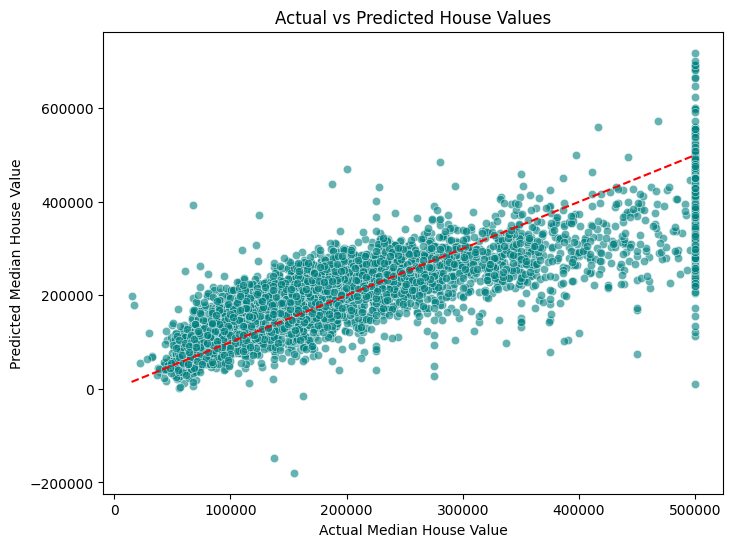

In [38]:
# 9. Visualization

# 9)a. Seaborn: Plot Predicted vs Actual
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r') # ideal line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Values')
plt.show()

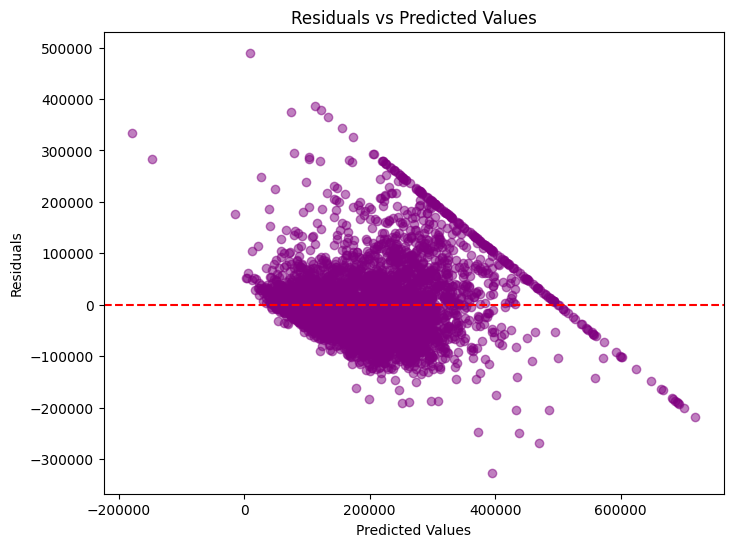

In [39]:
# 9)b. Matplotlib: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()